Import necessary packages

In [29]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
from copy import deepcopy
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX

warnings.simplefilter(action="ignore")

In [35]:
sales = pd.read_csv("Sarimax Forecasting Total SA.csv", parse_dates=["DATE"], dayfirst=False)\
        .rename(columns={"TOTALSA": "Sales"})
GDP = pd.read_csv("GDP.csv", parse_dates=["DATE"], dayfirst=False)\
        .assign(GDP = lambda cols: cols["GDP"]/1000)

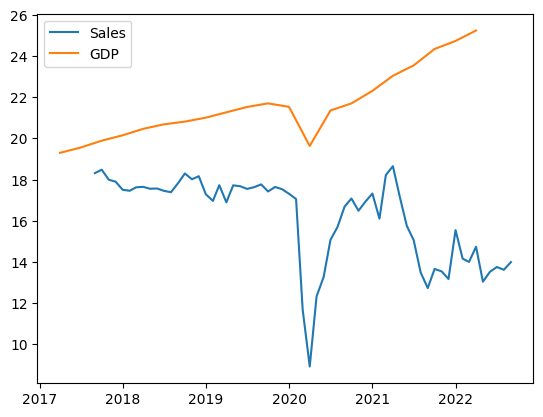

In [36]:
plt.figure()
plt.plot(sales["DATE"], sales["Sales"], label="Sales")
plt.plot(GDP["DATE"], GDP["GDP"], label="GDP")
plt.legend()
plt.show()

In [37]:
GDP = GDP.assign(DATE = lambda cols: cols["DATE"] + pd.Timedelta(32, "D"))\
        .assign(DATE = lambda cols: cols["DATE"].apply(lambda x: x.replace(day=1)))

GDP

,DATE,GDP
0,2017-05-01,19.304506
1,2017-08-01,19.561896
2,2017-11-01,19.894750
3,2018-02-01,20.155486
4,2018-05-01,20.470197
5,2018-08-01,20.687278
6,2018-11-01,20.819269
7,2019-02-01,21.013085
8,2019-05-01,21.272448
9,2019-08-01,21.531839


In [51]:
df =pd.merge(
    left = sales,
    right = GDP,
    on = "DATE",
    how = "outer"
).sort_values("DATE", ascending=True)

df["GDP"] = df["GDP"].interpolate(method="linear", limit_direction="BACKWARD")

GDP_avg_growth_rate = (df["GDP"] / df["GDP"].shift(1)).dropna().tail(5).mean()
for i in range(df.shape[0]):
    if(pd.isnull(df.loc[i, "GDP"])):
        df.loc[i, "GDP"] = df.loc[i-1, "GDP"] * GDP_avg_growth_rate

df = df.dropna(axis=0, how="any").reset_index(drop=True)
df

,DATE,Sales,GDP
0,2017-09-01,18.318,19.672847
1,2017-10-01,18.484,19.783799
2,2017-11-01,17.995,19.894750
3,2017-12-01,17.903,19.981662
4,2018-01-01,17.508,20.068574
...,...,...,...
56,2022-05-01,13.044,25.248476
57,2022-06-01,13.523,25.405137
58,2022-07-01,13.756,25.562771
59,2022-08-01,13.621,25.721382


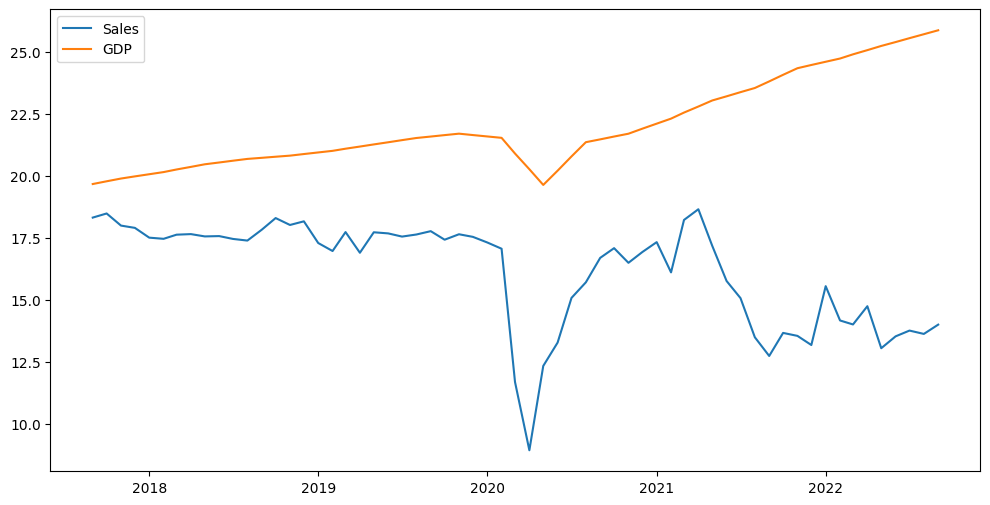

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(df["DATE"], df["Sales"], label="Sales")
plt.plot(df["DATE"], df["GDP"], label="GDP")
plt.legend()
plt.show()